## 1. Credit card applications
Commercial banks receive a lot of applications for credit cards. Many of them get rejected for many reasons, like high loan balances, low income levels, or too many inquiries on an individual's credit report, for example. Manually analyzing these applications is mundane, error-prone, and time-consuming (and time is money!). Luckily, this task can be automated with the power of machine learning and pretty much every commercial bank does so nowadays. In this notebook, we will build an automatic credit card approval predictor using machine learning techniques.

1.why is your proposal important into day's world ?

A.Predicting a good client is valuable for a bank as it helps them identify individuals with a higher likelihood of timely repayments, reducing the chances of bad debts and financial losses.

2.How is it going to impact the banking sector

A.By through,Predictive modeling techniques for credit card approval in the banking sector can have several impacts:
  i.Improved Risk Management
  ii.Faster way to approach the solutions

In [1]:
# importing some of the libraries like pandas,numpy,matplotlib.pyplot,seaborn
import pandas as pd    # pd as context manager
import numpy as np     # np as context manager
import matplotlib.pyplot as plt   # plt as context manager
import seaborn as sns   # sns as context manager
%matplotlib inline

In [2]:
df_cc = pd.read_csv("Credit_card.csv")   # Features name ("Credit_card.csv")

In [3]:
df_ccl = pd.read_csv("Credit_card_label.csv") # ("Credit_card_label.csv") contains the ID and LAbel

In [4]:
# By performing a left join merge operation on the two DataFrames using the common 'Ind_ID' column, you can combine the information from both DataFrames, retaining all the rows from the left DataFrame and matching rows from the right DataFrame.
final_df=pd.merge(df_cc,df_ccl,on='Ind_ID', how='left')  
final_df.head(2) ## The head command is used to display the first few rows of a dataset

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


In [5]:
import copy

# Create a deep copy of a dataset
df = copy.deepcopy(final_df)

## Dataset Exploration 

The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. 

Let's read the data and look at the first 5 rows using the head method. The number of the output rows from the dataset is determined by the head method parameter.

In [6]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,1


### Let's look at the dataset size, feature names and their types

In [7]:
print(df.shape)
df.tail(5)

(1548, 19)


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,label
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,0
1547,5053790,F,Y,Y,0,225000.0,Working,Higher education,Married,House / apartment,-16601.0,-2859,1,0,0,0,NaN,2,0


The dataset contains 1548 objects (rows), for each of which 19 features are set (columns), including 1 target feature (y).

### Attributing information

Output the column (feature) names:

In [8]:
df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'label'],
      dtype='object')

Input features (column names):

Ind_ID:Client ID,
Gender: Gender information,
Car_Owner: Having car or not,
Proper_owner: HAving property or not,
Children: Count of children,
Annual_income: Annual income,
Type_Income:Income type,
Education:Education level,
Martial_status:Martial_status,
Housing_type: Living style,
Birthday_count: Use backward count from current day(0),-1 means yesterday,
Employed_days:Start date of employment.USe backward count from current day(0).POsitive value means,undividual is currently, unemployed,
Mobile_phone:Any mobile phone,
Work_phone:Any work phone,
Phone: Any phone number,
EMAIL_ID: Any email ID,
Type_Occupation:Occupation,
Family_Members: FAmily size,

Output feature (desired target):

label - (0-Application Approved,1 - Application rejected)
To see the general information on all the DataFrame features (columns), we use the info method:

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1548 entries, 0 to 1547
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Ind_ID           1548 non-null   int64  
 1   GENDER           1541 non-null   object 
 2   Car_Owner        1548 non-null   object 
 3   Propert_Owner    1548 non-null   object 
 4   CHILDREN         1548 non-null   int64  
 5   Annual_income    1525 non-null   float64
 6   Type_Income      1548 non-null   object 
 7   EDUCATION        1548 non-null   object 
 8   Marital_status   1548 non-null   object 
 9   Housing_type     1548 non-null   object 
 10  Birthday_count   1526 non-null   float64
 11  Employed_days    1548 non-null   int64  
 12  Mobile_phone     1548 non-null   int64  
 13  Work_Phone       1548 non-null   int64  
 14  Phone            1548 non-null   int64  
 15  EMAIL_ID         1548 non-null   int64  
 16  Type_Occupation  1060 non-null   object 
 17  Family_Members

Method describe shows the main statistical characteristics of the dataset for each numerical feature (int64 and float64 types): the existing values number, mean, standard deviation, range, min & max, 0.25, 0.5 and 0.75 quartiles.

In [10]:
df.describe()

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,label
count,1.548000e+03,1548.000000,1.525000e+03,1526.000000,1548.000000,1548.0,1548.000000,1548.000000,1548.000000,1548.000000,1548.000000
mean,5.078920e+06,0.412791,1.913993e+05,-16040.342071,59364.689922,1.0,0.208010,0.309432,0.092377,2.161499,0.113049
std,4.171759e+04,0.776691,1.132530e+05,4229.503202,137808.062701,0.0,0.406015,0.462409,0.289651,0.947772,0.316755
min,5.008827e+06,0.000000,3.375000e+04,-24946.000000,-14887.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
25%,5.045070e+06,0.000000,1.215000e+05,-19553.000000,-3174.500000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
50%,5.078842e+06,0.000000,1.665000e+05,-15661.500000,-1565.000000,1.0,0.000000,0.000000,0.000000,2.000000,0.000000
75%,5.115673e+06,1.000000,2.250000e+05,-12417.000000,-431.750000,1.0,0.000000,1.000000,0.000000,3.000000,0.000000
max,5.150412e+06,14.000000,1.575000e+06,-7705.000000,365243.000000,1.0,1.000000,1.000000,1.000000,15.000000,1.000000


The msno module within the missingno library offers several functions to visualize missing data, including:

matrix(): This function creates a matrix or heatmap visualization where missing values are represented by white lines, allowing you to quickly identify the locations and patterns of missing data.

In [11]:
import missingno as msno # library to examine missing values

<AxesSubplot: >

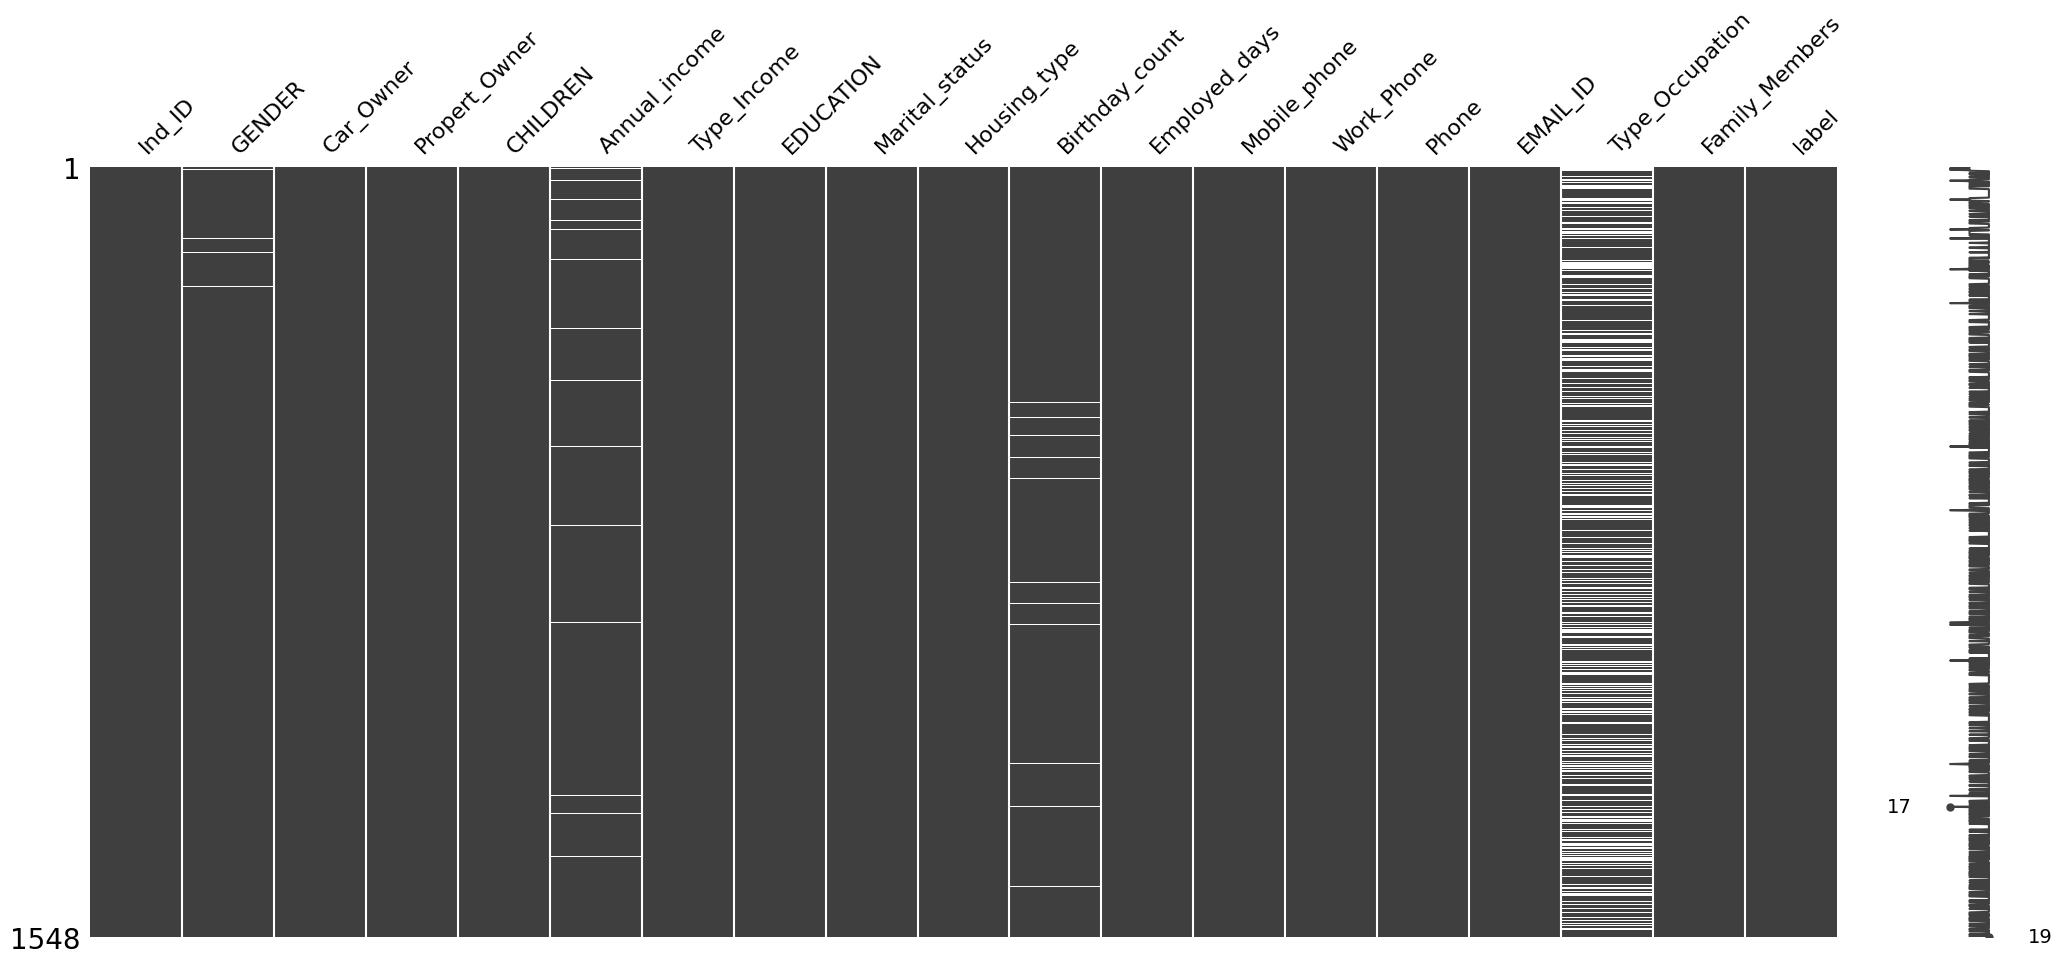

In [12]:
msno.matrix(df)

<AxesSubplot: >

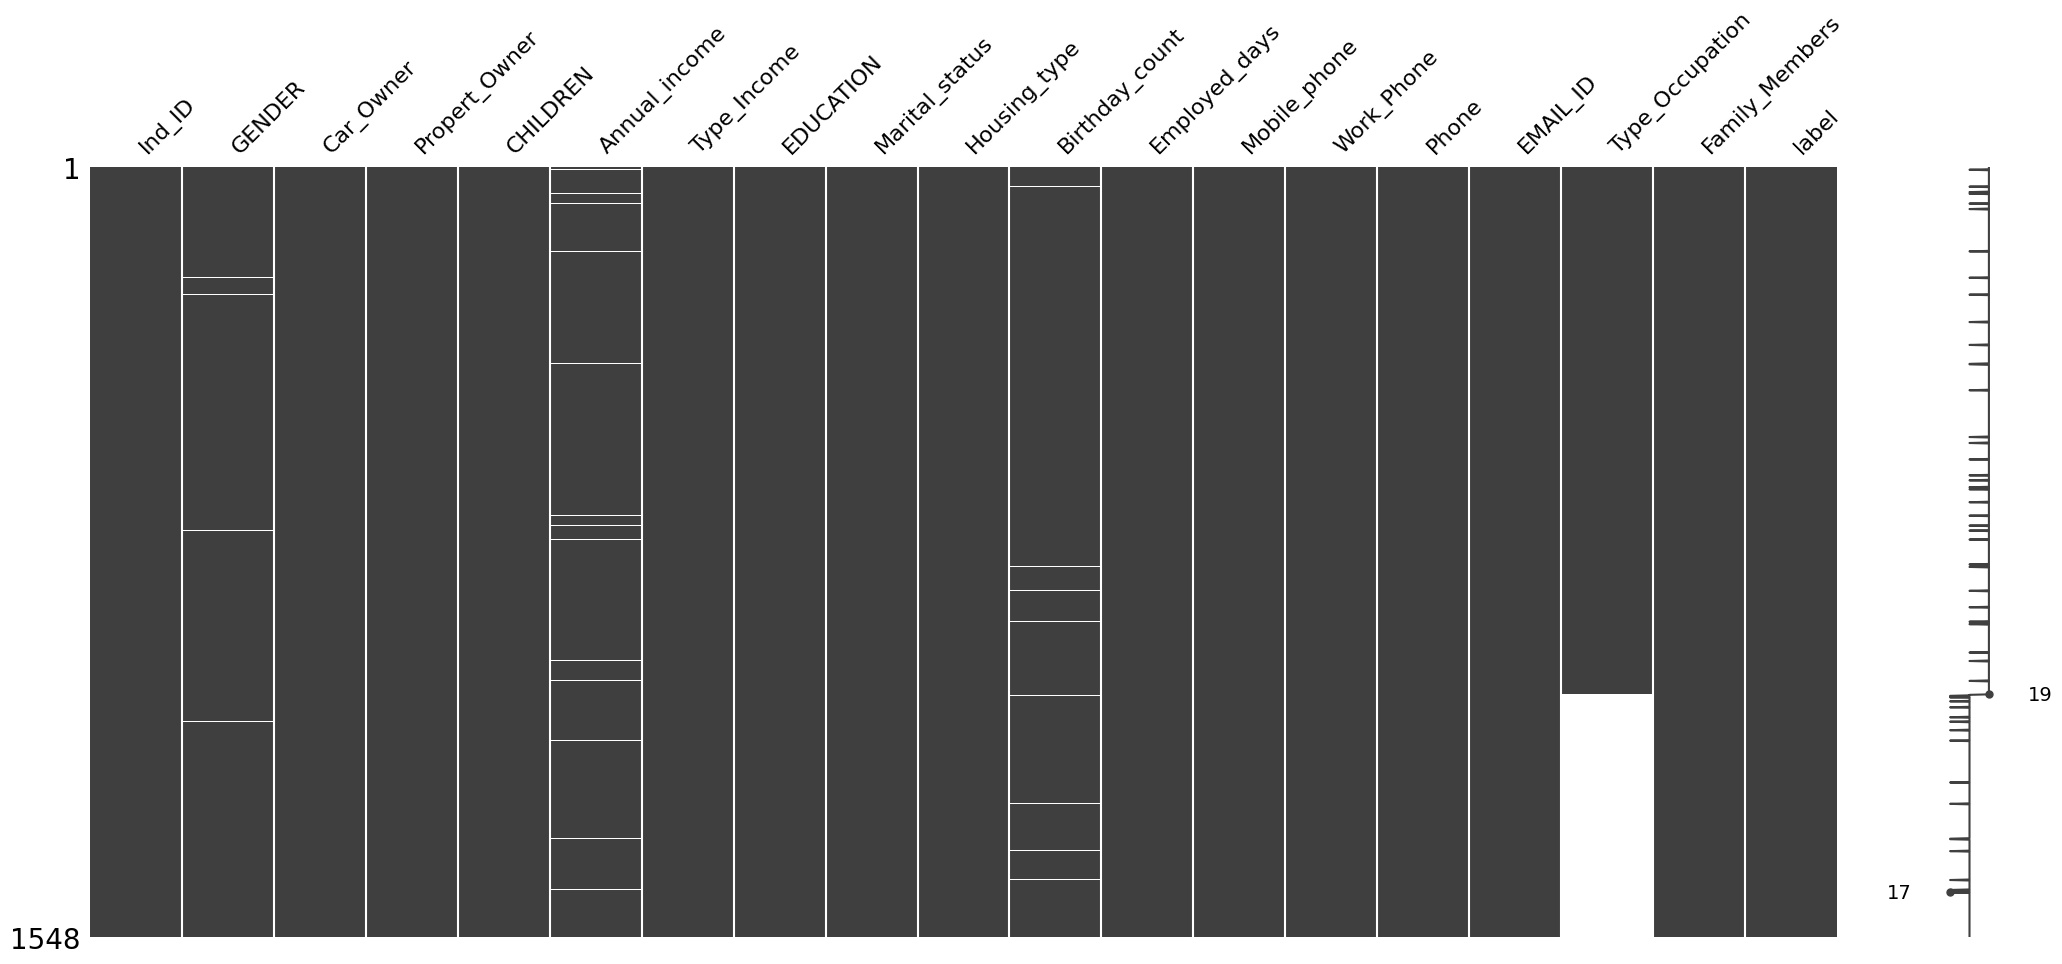

In [13]:
sorted = df.sort_values('Type_Occupation') # sorting values based on Type_Occupation
msno.matrix(sorted)

### Visualization in Pandas

Method heatmap allows you to visualize the pairwise dependencies between the features (as well as the distribution of each feature on the diagonal).
We will do it for numerical features.

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\223050325.py:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


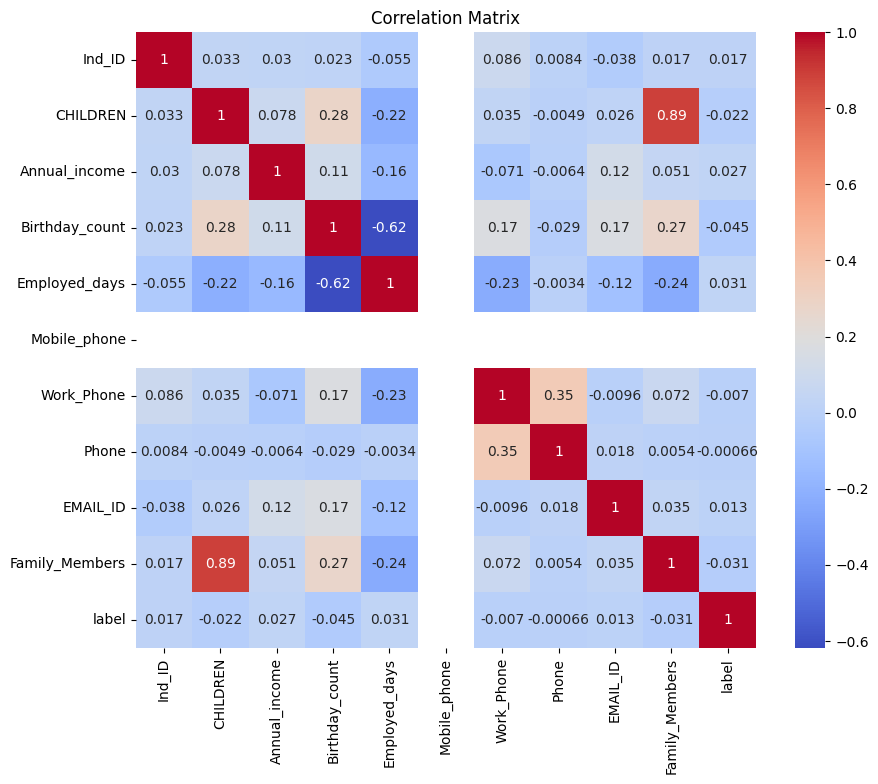

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the credit card dataset

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


### Now build histogram for features all together:

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


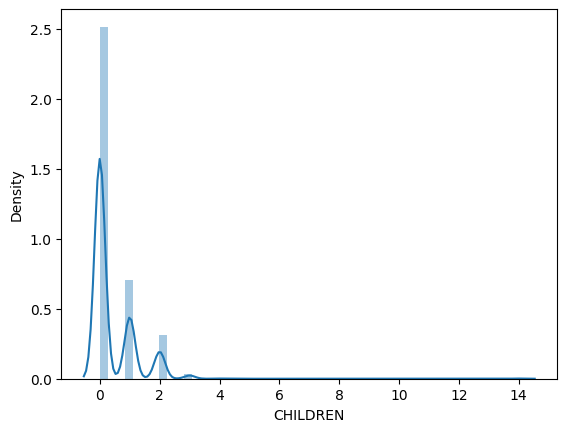

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


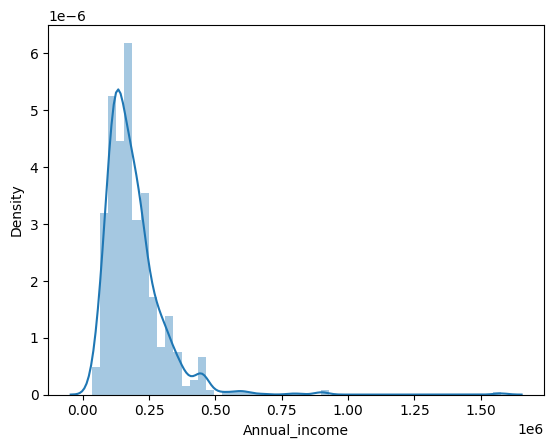

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


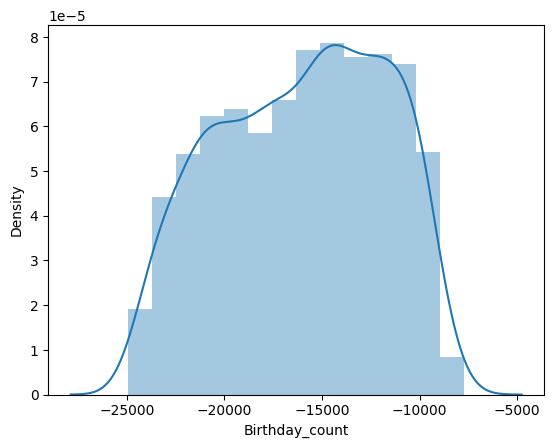

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


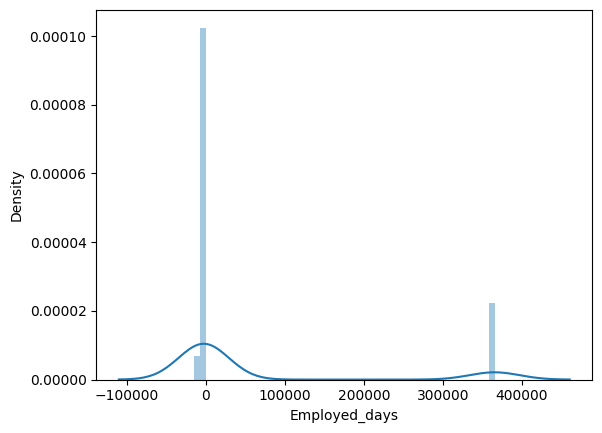

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)
C:\Users\sudheer\anaconda3\lib\site-packages\seaborn\distributions.py:2511: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


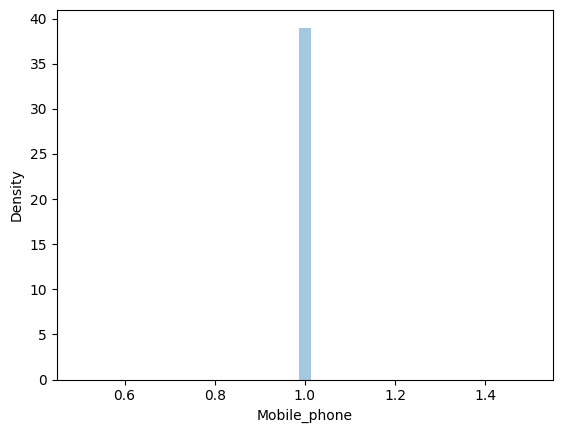

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


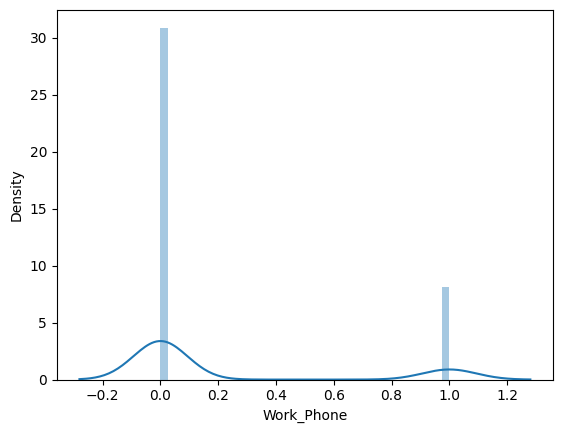

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


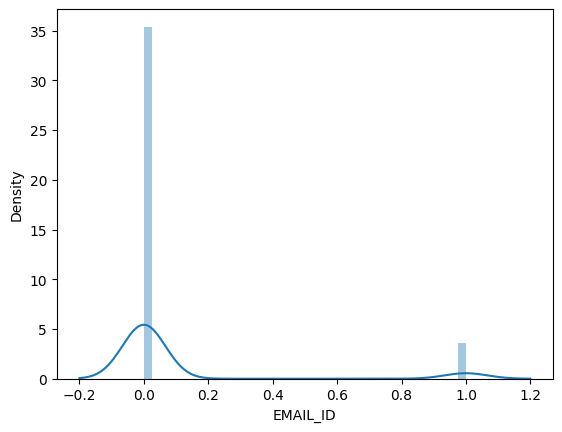

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


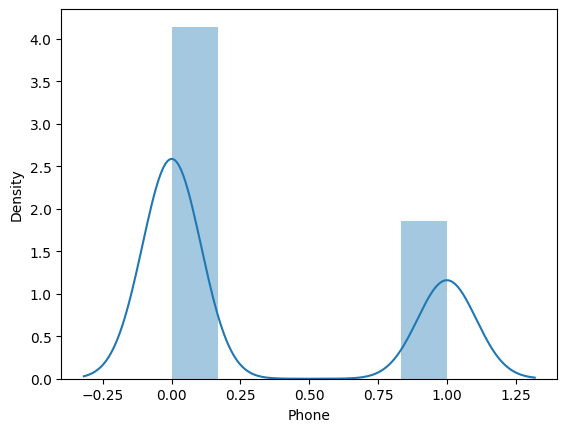

C:\Users\sudheer\AppData\Local\Temp\ipykernel_2312\1356394466.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(col)


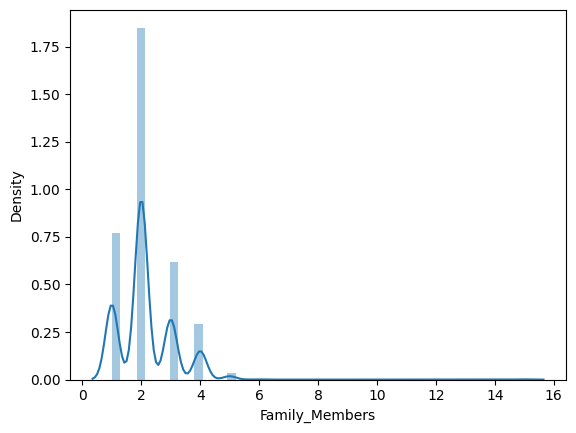

In [15]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(df['CHILDREN'])
plotDistPlot(df['Annual_income'])
plotDistPlot(df['Birthday_count'])
plotDistPlot(df['Employed_days'])
plotDistPlot(df['Mobile_phone'])
plotDistPlot(df['Work_Phone'])
plotDistPlot(df['EMAIL_ID'])
plotDistPlot(df['Phone'])
plotDistPlot(df['Family_Members'])

## Data Cleaning
#### Drop unwanted columns

In order to simplify the DataSet, I proceeded to remove the 'Mobile_phone' column from the original dataset.

In [16]:
# From the above view mobile feature has no siginficance for the model prediction.so,drop the column
df.drop("Mobile_phone",axis=1,inplace=True)

In [17]:
# The code df.isnull().sum() is used to check the number of missing values in each column of the DataFrame df.
df.isnull().sum()

Ind_ID               0
GENDER               7
Car_Owner            0
Propert_Owner        0
CHILDREN             0
Annual_income       23
Type_Income          0
EDUCATION            0
Marital_status       0
Housing_type         0
Birthday_count      22
Employed_days        0
Work_Phone           0
Phone                0
EMAIL_ID             0
Type_Occupation    488
Family_Members       0
label                0
dtype: int64

In [18]:
# The code df["GENDER"].value_counts() is used to count the occurrences of each unique value in the "GENDER" column of the DataFrame df. 
# It provides the count of each unique value in the column.
df["GENDER"].value_counts()

F    973
M    568
Name: GENDER, dtype: int64

### Dealing with Missing Values

Missing values is one of the most common problems that you will come across when performing data analysis. Furthermore, machine learning models require that a dataset does not contain any missing values before they can be fitted to the data. Therefore, it is crucial that we learn how to properly handle them.
One of the imputation technique we used commonly is Simple Imputation


#### Simple Imputer
Simple imputer follows a univariate approach to imputing missing values i.e. it only takes a single feature into consideration. Some of the most common uses of simple imputer are:

Mean,
Median,
Most frequent (mode)

In [19]:
# To handle missing values in the "Annual_income" column, a common approach is to replace the NaN values with the mean of the available values in the column, 
# Assuming that the column follows a Gaussian (normal) distribution (By considering the histogram)
df["Annual_income"].fillna(df["Annual_income"].mean(),inplace = True)

In [20]:
# To handle missing values in the "Birthday_count" column, a common approach is to replace the NaN values with the mean of the available values in the column, 
# Assuming that the column follows a Gaussian (normal) distribution.
df["Birthday_count"].fillna(df["Birthday_count"].mean(),inplace = True)

In [21]:
# To handle missing values in the 'GENDER' column, we can use the mode of the column, accessed with df['GENDER'].mode()[0], 
# To fill the missing values with the most frequent category, represented by "0".
df['GENDER'].fillna(df['GENDER'].mode()[0], inplace=True)

In [22]:
df["Type_Occupation"].value_counts()

Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Cleaning staff            22
Cooking staff             21
Private service staff     17
Secretaries                9
Low-skill Laborers         9
Waiters/barmen staff       5
HR staff                   3
IT staff                   2
Realty agents              2
Name: Type_Occupation, dtype: int64


In this scenario, where there are numerous categories in a categorical feature, we can handle missing values by replacing them with a designated value such as "missing" using random imputation. This approach involves randomly assigning the "missing" value to the missing observations in order to preserve the distribution and diversity of the existing categories

I replaced NAN with "missing" using Random Imputation

In [23]:
def impute_nan(df,variable):
    df[variable] = np.where(df[variable].isnull(),"Missing",df[variable])

In [24]:
impute_nan(df,"Type_Occupation")

In [25]:
# AS the categories present in this category are more so we are considering top 10 records for encoding
df["Type_Occupation"].value_counts().sort_values(ascending = False).head(10)

Missing                  488
Laborers                 268
Core staff               174
Managers                 136
Sales staff              122
Drivers                   86
High skill tech staff     65
Medicine staff            50
Accountants               44
Security staff            25
Name: Type_Occupation, dtype: int64

In [26]:
# The categories are sorted in descending order of frequency using the 'value_counts()' method. 
# By converting the index of the resulting Series to a list, we obtain the desired list of the top 10 categories.
list_10 = df["Type_Occupation"].value_counts().sort_values(ascending = False).head(10).index
list_10 = list(list_10)

# Feature Engineering

## Data Preprocessing

## Handling Categorical Variables

Handling Categorical/Qualitative variables is an important step in data preprocessing.Many Machine learning algorithms can not handle categorical variables by themself unless we convert them to numerical values.
And performance of ML algorithms is based on how Categorical variables are encoded. 
The results produced by the model varies from different encoding techniques used.

Categorical variables can be divided into two categories:

Nominal (No particular order)
Ordinal (some ordered).

### One Hot Encoding

In this technique, it creates a new column/feature for each category in the Categorical Variable and replaces with either 1 (presence of the feature) or 0 (absence of the feature). 
The number of column/feature depends on the number of categories in the Categorical Variable.
This method slows down the learning process significantly if the number of the categories are very high.

In [27]:
#Apply Encoding technique
import numpy as np
for categories in list_10:
    df[categories] = np.where(df["Type_Occupation"] == categories,1,0)

In [28]:
# This line of code drops the column "Type_Occupation" from the DataFrame 'df', modifying it in place.
df.drop("Type_Occupation",axis = 1,inplace=True)

In [29]:
df.columns # shows all the features in a data set

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Work_Phone',
       'Phone', 'EMAIL_ID', 'Family_Members', 'label', 'Missing', 'Laborers',
       'Core staff', 'Managers', 'Sales staff', 'Drivers',
       'High skill tech staff', 'Medicine staff', 'Accountants',
       'Security staff'],
      dtype='object')

In [30]:
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,...,Missing,Laborers,Core staff,Managers,Sales staff,Drivers,High skill tech staff,Medicine staff,Accountants,Security staff
0,5008827,M,Y,Y,0,180000.00000,Pensioner,Higher education,Married,House / apartment,...,1,0,0,0,0,0,0,0,0,0
1,5009744,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,0,0,0,0,0,0,0,0,0
2,5009746,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,0,0,0,0,0,0,0,0,0
3,5009749,F,Y,N,0,191399.32623,Commercial associate,Higher education,Married,House / apartment,...,1,0,0,0,0,0,0,0,0,0
4,5009752,F,Y,N,0,315000.00000,Commercial associate,Higher education,Married,House / apartment,...,1,0,0,0,0,0,0,0,0,0


In [31]:
# This code returns the unique values in the "Type_Income" column of the DataFrame 'df'.
df["Type_Income"].unique()

array(['Pensioner', 'Commercial associate', 'Working', 'State servant'],
      dtype=object)

### Pandas get_dummies

The get_dummies function provides options for handling missing values and dropping one of the dummy variable columns to avoid multicollinearity. It is a convenient method for preparing categorical variables for machine learning models that require numerical inputs.

In [32]:
df_type_income= pd.get_dummies(df['Type_Income'], drop_first=True)
df_type_income.head(2)

,Pensioner,State servant,Working
0,1,0,0
1,0,0,0


In [33]:
# This code concatenates the DataFrame 'df' with the DataFrame 'df_type_income' along the columns (axis=1) and assigns the result back to 'df'.
df=pd.concat([df,df_type_income],axis=1)

In [34]:
##drop Type_Income Category Feature because we added the individual categories to the daatset
df.drop('Type_Income',axis=1,inplace=True)
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Marital_status,Housing_type,Birthday_count,...,Managers,Sales staff,Drivers,High skill tech staff,Medicine staff,Accountants,Security staff,Pensioner,State servant,Working
0,5008827,M,Y,Y,0,180000.00000,Higher education,Married,House / apartment,-18772.000000,...,0,0,0,0,0,0,0,1,0,0
1,5009744,F,Y,N,0,315000.00000,Higher education,Married,House / apartment,-13557.000000,...,0,0,0,0,0,0,0,0,0,0
2,5009746,F,Y,N,0,315000.00000,Higher education,Married,House / apartment,-16040.342071,...,0,0,0,0,0,0,0,0,0,0
3,5009749,F,Y,N,0,191399.32623,Higher education,Married,House / apartment,-13557.000000,...,0,0,0,0,0,0,0,0,0,0
4,5009752,F,Y,N,0,315000.00000,Higher education,Married,House / apartment,-13557.000000,...,0,0,0,0,0,0,0,0,0,0


In [35]:
df["Marital_status"].unique()

array(['Married', 'Single / not married', 'Civil marriage', 'Separated',
       'Widow'], dtype=object)

In [36]:
df_martial_status= pd.get_dummies(df['Marital_status'], drop_first=True)
df_martial_status

,Married,Separated,Single / not married,Widow
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
1543,1,0,0,0
1544,0,0,1,0
1545,1,0,0,0
1546,0,0,0,0


In [37]:
df=pd.concat([df,df_martial_status],axis=1)

In [38]:
# This line of code drops the column "Marital_status" from the DataFrame 'df', modifying it in place.
df.drop('Marital_status',axis=1,inplace=True)

In [39]:
# This code returns the unique values in the "Housing_type" column of the DataFrame 'df'.
df["Housing_type"].unique()

array(['House / apartment', 'With parents', 'Rented apartment',
       'Municipal apartment', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [40]:
df_housing_type= pd.get_dummies(df['Housing_type'], drop_first=True)

In [41]:
df=pd.concat([df,df_housing_type],axis=1)

In [42]:
# This line of code drops the column "Housing_type" from the DataFrame 'df', modifying it in place.
df.drop("Housing_type",axis =1,inplace = True)

### Custom Encoding Technique or Ordinal Encoding Technique

In [43]:
df["GENDER"].value_counts()

F    980
M    568
Name: GENDER, dtype: int64

In [44]:
##Handling categorical feature Gender
# Custom Encoding Technique
df['GENDER']=df['GENDER'].map({'F':0,'M':1})

In [45]:
df["Car_Owner"].value_counts()

N    924
Y    624
Name: Car_Owner, dtype: int64

In [46]:
# Custom Encoding Technique
df['Car_Owner']=df['Car_Owner'].map({'Y':0,'N':1})

In [47]:
##Handling categorical feature Propert_Owner
# Have used Custom Encoding Technique
df['Propert_Owner']=df['Propert_Owner'].map({'Y':0,'N':1})

In [48]:
df["EDUCATION"].value_counts()

Secondary / secondary special    1031
Higher education                  426
Incomplete higher                  68
Lower secondary                    21
Academic degree                     2
Name: EDUCATION, dtype: int64

In [49]:
# Perform Ordinal encoding as education feature has relational categories
df['EDUCATION']=df['EDUCATION'].map({'Secondary / secondary special':1,'Higher education':2,'Incomplete higher':3,'Lower secondary':4,'Academic degree':5})
df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Work_Phone,...,Working,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,5008827,1,0,0,0,180000.00000,2,-18772.000000,365243,0,...,0,1,0,0,0,1,0,0,0,0
1,5009744,0,0,1,0,315000.00000,2,-13557.000000,-586,1,...,0,1,0,0,0,1,0,0,0,0
2,5009746,0,0,1,0,315000.00000,2,-16040.342071,-586,1,...,0,1,0,0,0,1,0,0,0,0
3,5009749,0,0,1,0,191399.32623,2,-13557.000000,-586,1,...,0,1,0,0,0,1,0,0,0,0
4,5009752,0,0,1,0,315000.00000,2,-13557.000000,-586,1,...,0,1,0,0,0,1,0,0,0,0


In [51]:
df["label"].value_counts()   #imbalanced data set

0    1373
1     175
Name: label, dtype: int64

In [55]:
import copy

# Create a deep copy of a dataset
# The purpose of creating new_df is to standardize the features in order to ensure that they have comparable scales, which can improve the performance of logistic regression algorithms. 
# The new_df dataset will be used as input for the logistic regression model.
new_df = copy.deepcopy(df)   

In [56]:
new_df.head()

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,EDUCATION,Birthday_count,Employed_days,Work_Phone,...,Working,Married,Separated,Single / not married,Widow,House / apartment,Municipal apartment,Office apartment,Rented apartment,With parents
0,5008827,1,0,0,0,180000.00000,2,-18772.000000,365243,0,...,0,1,0,0,0,1,0,0,0,0
1,5009744,0,0,1,0,315000.00000,2,-13557.000000,-586,1,...,0,1,0,0,0,1,0,0,0,0
2,5009746,0,0,1,0,315000.00000,2,-16040.342071,-586,1,...,0,1,0,0,0,1,0,0,0,0
3,5009749,0,0,1,0,191399.32623,2,-13557.000000,-586,1,...,0,1,0,0,0,1,0,0,0,0
4,5009752,0,0,1,0,315000.00000,2,-13557.000000,-586,1,...,0,1,0,0,0,1,0,0,0,0


In [57]:
new_df.isnull().sum()

Ind_ID                   0
GENDER                   0
Car_Owner                0
Propert_Owner            0
CHILDREN                 0
Annual_income            0
EDUCATION                0
Birthday_count           0
Employed_days            0
Work_Phone               0
Phone                    0
EMAIL_ID                 0
Family_Members           0
label                    0
Missing                  0
Laborers                 0
Core staff               0
Managers                 0
Sales staff              0
Drivers                  0
High skill tech staff    0
Medicine staff           0
Accountants              0
Security staff           0
Pensioner                0
State servant            0
Working                  0
Married                  0
Separated                0
Single / not married     0
Widow                    0
House / apartment        0
Municipal apartment      0
Office apartment         0
Rented apartment         0
With parents             0
dtype: int64

In [58]:
new_df["label"].value_counts()

0    1373
1     175
Name: label, dtype: int64

## Splitting data into training and testing

In [59]:
## Spliting into X (features) and Y (Target Variable)
X = new_df.drop("label", axis=1)

In [60]:
y = new_df["label"]

In [61]:
X.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'EDUCATION', 'Birthday_count', 'Employed_days',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Family_Members', 'Missing',
       'Laborers', 'Core staff', 'Managers', 'Sales staff', 'Drivers',
       'High skill tech staff', 'Medicine staff', 'Accountants',
       'Security staff', 'Pensioner', 'State servant', 'Working', 'Married',
       'Separated', 'Single / not married', 'Widow', 'House / apartment',
       'Municipal apartment', 'Office apartment', 'Rented apartment',
       'With parents'],
      dtype='object')

### The following are the feature importances for predicting the target variable (Y).

In [62]:
# Splitting the dataset into training and testing with a test size of 0.3,random_state = 42
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

To ensure compatibility with logistic regression, the split data has been standardized using standardization techniques. This preprocessing step helps to bring the features to a common scale.

In [63]:
# Z-score Standardization: Also known as StandardScaler, it transforms the data to have zero mean and unit variance.Uses sklearn library.
from sklearn.preprocessing import StandardScaler

In [64]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train) # The fit_transform method is applied to the training data (X_train) using the scaler object, which computes the mean and standard deviation of the training data and scales it accordingly.

In [65]:
X_train_scaled

array([[ 1.58924576, -0.75469545,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296],
       [ 0.30774123,  1.32503781,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296],
       [-0.79057902, -0.75469545,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296],
       ...,
       [-1.37271756,  1.32503781, -1.25397231, ..., -0.06810447,
        -0.12245535, -0.22230296],
       [-0.26720894, -0.75469545,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296],
       [-0.2668519 , -0.75469545, -1.25397231, ..., -0.06810447,
        -0.12245535, -0.22230296]])

In [66]:
X_test_scaled=scaler.transform(X_test) #The transform method is applied to the test data (X_test) using the scaler object

In [67]:
X_test_scaled

array([[-1.20255325, -0.75469545,  0.79746577, ..., -0.06810447,
         8.16624149, -0.22230296],
       [-0.67725517, -0.75469545,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296],
       [-1.20345775, -0.75469545,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296],
       ...,
       [ 0.81140281, -0.75469545,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296],
       [ 0.81097436,  1.32503781,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296],
       [ 0.25068656,  1.32503781,  0.79746577, ..., -0.06810447,
        -0.12245535, -0.22230296]])

# Machine Learning Models

## Logistic Regression model 

A very simple Logistic Regression classifier implemented in python. The sklearn.linear_model library is used to import the LogisticRegression class. A classifier object of that class was created and fitted with the X_Train and Y_Train varibles.

A confusion matrix was implemented to test the prediction accuracy of the classifier.

To optimize the model performance, hyperparameter tuning and cross-validation with k-fold technique were employed. Hyperparameter tuning helps to find the best combination of hyperparameters for the model, while k-fold cross-validation provides an unbiased estimate of the model's performance by splitting the data into k subsets and iteratively training and evaluating the model on different subsets.

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import KFold
import numpy as np
from sklearn.model_selection import GridSearchCV

In [69]:
# Create a logistic regression classifier
model = LogisticRegression()

# Define the hyperparameters and their possible values
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'sag'],
    'max_iter': [100, 200, 500, 1000],
    'class_weight': ['balanced', None]
}
cv=KFold(n_splits=5,random_state=None,shuffle=False)

In [71]:
clf=GridSearchCV(model,param_grid,cv=cv,scoring='f1_macro')
clf.fit(X_train_scaled,y_train)  ## Fitting the Logistic Regression into the Training set

C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: T

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 200, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'sag']},
             scoring='f1_macro')

The test set results were predicted using the trained model, and the accuracy of the predictions was calculated.

In [72]:
y_pred=clf.predict(X_test_scaled)   # Predicting the test set results

In [74]:
# Retrieve the best hyperparameters
best_params = clf.best_params_
print(best_params)

{'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [75]:
# Assuming y_test and y_pred defined
confusion = confusion_matrix(y_test, y_pred)  # Making the Confusion Matrix

# Accessing the elements of the confusion matrix
TP = confusion[1, 1]  # True positive
TN = confusion[0, 0]  # True negatives
FP = confusion[0, 1]  # False positives
FN = confusion[1, 0]  # False negative

In [76]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Assuming y_test and y_pred defined
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]  # true positive
FN = confusion[1, 0]  # false negatives

# Sensitivity
sensitivity = TP / float(TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test,y_pred))


Accuracy: 0.9053763440860215
Sensitivity: 0.046511627906976744
Specificity:- 0.9928909952606635
F1-Score:- 0.08333333333333333


In [77]:
# classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       422
           1       0.40      0.05      0.08        43

    accuracy                           0.91       465
   macro avg       0.66      0.52      0.52       465
weighted avg       0.86      0.91      0.87       465



### ROC on the test set

In [78]:
# Predicted probability
y_test_pred_proba = clf.predict_proba(X_test_scaled)[:,1]

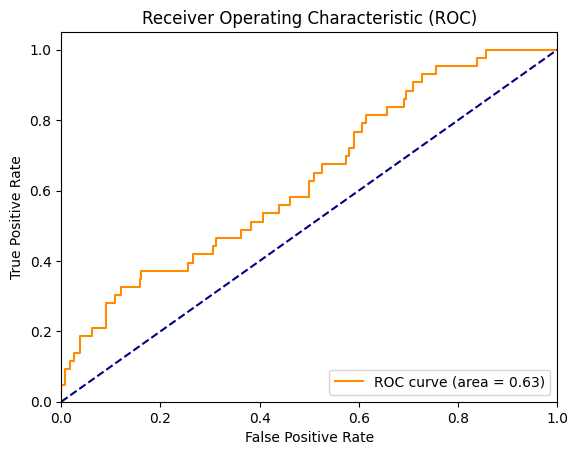

In [79]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_test_pred_proba defined
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


Test set

Accuracy = 0.90,
Sensitivity = 0.04,
Specificity = 0.99,
F1-Score = 0.083,
ROC = 0.63

## XGBoost with Python and Scikit-Learn

XGBoost is an acronym for Extreme Gradient Boosting. It is a powerful machine learning algorithm that can be used to solve classification and regression problems

In [80]:
# Importing XGBoost
from xgboost import XGBClassifier

In [81]:
# hyperparameter tuning with XGBoost

# creating a KFold object 
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]}          


# specify model
xgb_model = XGBClassifier(max_depth=2,objective='binary:logistic', n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = param_grid, 
                        scoring= 'roc_auc', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [82]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [83]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[16:02:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [84]:
# Predictions on the test set
y_pred = xgb_imb_model.predict(X_test)

In [85]:
print(confusion_matrix(y_test,y_pred))

[[420   2]
 [ 21  22]]


In [86]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [87]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Assuming y_test and y_pred defined
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]  # true positive
FN = confusion[1, 0]  # false negatives

# Sensitivity
sensitivity = TP / float(TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test,y_pred))

Accuracy: 0.9505376344086022
Sensitivity: 0.5116279069767442
Specificity:- 0.9928909952606635
F1-Score:- 0.6567164179104478


In [88]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       422
           1       0.92      0.51      0.66        43

    accuracy                           0.95       465
   macro avg       0.93      0.75      0.82       465
weighted avg       0.95      0.95      0.94       465



In [89]:
# Predicted probability
y_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

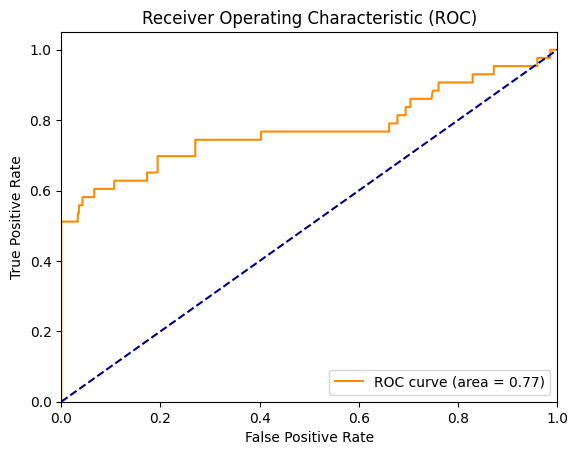

In [90]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_test_pred_proba defined
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

*Model summary*

Test set

Accuracy = 0.95
Sensitivity = 0.51
Specificity = 0.99
ROC-AUC = 0.77
F1-Score = 0.65

## Decision Tree Classification with Python and Scikit-Learn

A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. 

A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.

In [91]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

In [92]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'roc_auc',
                           cv = 3, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [93]:
# Printing the optimal sensitivity score and hyperparameters
print("Best roc_auc:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc_auc:- 0.570069783003537
DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=100)


In [94]:
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [95]:
# Predictions on the test set
y_pred = dt_imb_model.predict(X_test)

In [96]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[422   0]
 [ 43   0]]


In [97]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [98]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score


# Assuming y_test and y_pred defined
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]  # true positive
FN = confusion[1, 0]  # false negatives

# Sensitivity
sensitivity = TP / float(TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test,y_pred))

Accuracy: 0.9075268817204301
Sensitivity: 0.0
Specificity:- 1.0
F1-Score:- 0.0


In [99]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [100]:
# Predicted probability
y_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

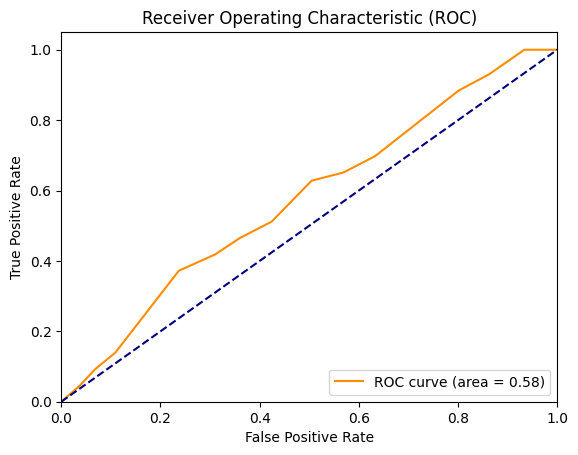

In [101]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_test_pred_proba defined
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

*Model summary*

Test set

Accuracy = 0.90
Sensitivity = 0.0
Specificity = 1.0
F-1 Score = 0.0
ROC-AUC = 0.58

## Random forest

A very simple Random Forest Classifier implemented in python. The sklearn.ensemble library was used to import the RandomForestClassifier class.


In [102]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

In [103]:
# Define the parameter grid
# param_grid = {
#     'n_estimators': [100, 500, 1000],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 5],
#     'max_features': ['auto', 'sqrt', 'log2', None],
#     'criterion': ['gini', 'entropy']
# } 
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 2,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 24 candidates, totalling 48 fits


GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 10, 5), 'max_features': [10, 20],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, verbose=1)

In [104]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8781162395727469 using {'max_depth': 5, 'max_features': 10, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 100}


In [105]:
# model with the best hyperparameters

rfc_imb_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=50,
                             max_features=10,
                             n_estimators=100)

In [106]:
# Fit the model
rfc_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_features=10, min_samples_leaf=50,
                       min_samples_split=50)

In [107]:
# Predictions on the test set
y_pred = rfc_imb_model.predict(X_test)

In [108]:
# Confusion matrix
confusion = confusion_matrix(y_test, y_pred)
print(confusion)

[[422   0]
 [ 43   0]]


In [109]:
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import f1_score

# Assuming y_test and y_pred defined
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

confusion = confusion_matrix(y_test, y_pred)
TP = confusion[1, 1]  # true positive
FN = confusion[1, 0]  # false negatives

# Sensitivity
sensitivity = TP / float(TP + FN)
print("Sensitivity:", sensitivity)

# Specificity
print("Specificity:-", TN / float(TN+FP))

# F1 score
print("F1-Score:-", f1_score(y_test,y_pred))

Accuracy: 0.9075268817204301
Sensitivity: 0.0
Specificity:- 1.0
F1-Score:- 0.0


In [110]:
# classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       422
           1       0.00      0.00      0.00        43

    accuracy                           0.91       465
   macro avg       0.45      0.50      0.48       465
weighted avg       0.82      0.91      0.86       465



C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sudheer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [111]:
# Predicted probability
y_pred_proba = rfc_imb_model.predict_proba(X_test)[:,1]

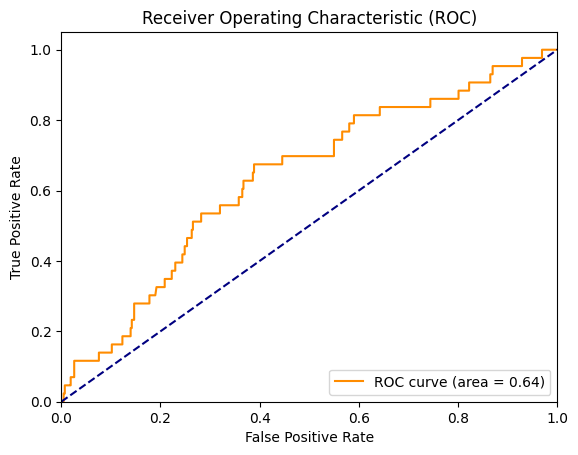

In [112]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming y_test and y_test_pred_proba defined
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

*Model summary*

Test set

Accuracy = 0.90
Sensitivity = 0.0
Specificity = 1.0
F-1 Score = 0.0
ROC-AUC = 0.63


<h1>Machine Learning Models Summary</h1>


|Classifier Name|     |Best Parameters|                                                                         |Accuracy|
|---------------|     |---------------|                                                                         |--------|
|logistic regression| |'C': 100, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear|  |90.53|
|XGBoosting|          |'learning_rate': 0.6, 'subsample': 0.9|                                                  |95.05|
|Decision Trees|      |max_depth=10, min_samples_leaf=50, min_samples_split=100|                                |90.75|
|Random Forest|       |'max_depth': 5,'max_features': 10,'min_samples_leaf': 50,'n_estimators': 100|            |90.75|

From the above Models XGBoost performs well with accuracy 95.05% and ROC-AUC = 0.77